In [6]:
import pandas as pd
data = pd.DataFrame({"2000Y"  : [12,10,16,19],
                     "2020Y": [14,12,17,23]})
data.head()

,2000Y,2020Y
0,12,14
1,10,12
2,16,17
3,19,23


In [16]:
import matplotlib.pyplot as plt
def graph_type(ax,g_type,value,**kwargs):
    """graphの出力タイプ
    """
    if g_type == "line":
            ax.plot(value,label=kwargs["label"],color=kwargs["color"],linewidth=3,marker="o")
    elif g_type =="hist":
        cnt_bins=len(value)
        ax.hist(value,bins=cnt_bins,label=kwargs["label"],color=kwargs["color"])
    elif g_type =="box":
            ax.boxplot(value,label=kwargs["label"],color=kwargs["color"])
    elif g_type =="bar":
        x=kwargs["x"]
        ax.bar(x,value,label=kwargs["label"],color=kwargs["color"])
    else:
        pass

In [17]:
class graph:
    def __init__(self):
        pass
    def duplex(self,**kwargs):
        # グラフの事象設定
        plt.figure(1,figsize=(10,5))

        # グラフの象限の設定
        row,col,pos=1,1,1
        ax=plt.subplot(1, 1, 1)

        # グラフの重複数設定
        duple=len(kwargs["g_type"])

        # グラフのデータ設定
        main_title=kwargs.get("main_title")
        x_title=kwargs.get("x_title")
        x_scale=kwargs.get("x_scale")
        if x_scale is None:
            pass
        else:
            x_scale,x_scale_label=x_scale
        x_rotation=kwargs.get("x_rotation",90)
        y_title=kwargs.get("y_title")
        y_scale=kwargs.get("y_scale")
        if y_scale is None:
            pass
        else:
            y_scale,y_scale_label=y_scale
        y_rotation=kwargs.get("y_rotation",90)
        g_type=kwargs["g_type"]
        g_data=kwargs["g_data"]
        label=kwargs.get("label")
        color=kwargs.get("color")
        
        i=0
        for i in range(duple):
            value = g_data[i]
            graph_type(ax,g_type[i],value,label=label[i],x=x_scale,color=color[i])
            i +=1
            
        # 軸の目盛りラベル
        if x_scale is None:
            pass
        else:
            plt.xticks(x_scale,x_scale_label,rotation=x_rotation)
        if y_scale is None:
            pass
        else:
            plt.yticks(y_scale,y_scale_label)
        
        # グラフの凡例
        plt.legend()

        # グラフのタイトル /ラベル
        plt.title(main_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

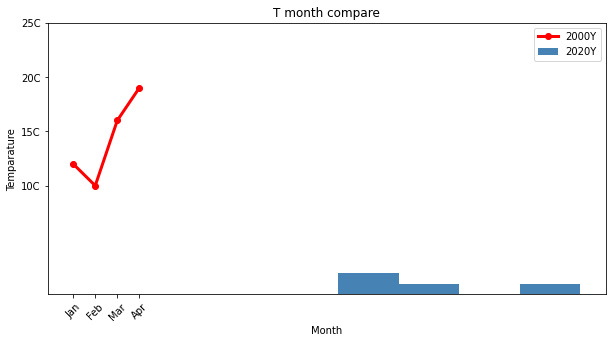

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
g=graph()
g.duplex(main_title="T month compare",
         x_title="Month",
         x_rotation=45,
         x_scale=[[0,1,2,3],["Jan","Feb","Mar","Apr"]],
         y_title="Temparature",
         y_scale=[[10,15,20,25],["10C","15C","20C","25C"]],
         y_rotation=90,
         g_type=["line","hist"],
         g_data=[data['2000Y'],data['2020Y']],
         label=["2000Y","2020Y"],
         color=["Red","steelblue"])